In [1]:
from xgboost import plot_tree
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.inspection import plot_partial_dependence 
from sklearn.inspection import partial_dependence 

c:\Users\1660v4\anaconda3\envs\AI_8\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index

Bad key text.latex.preview in file c:\Users\1660v4\anaconda3\envs\AI_8\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\Users\1660v4\anaconda3\envs\AI_8\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc

In [25]:
# 데이터 불러오기
CB_data1 = np.load('C:/Workspace/Conduction_AI/conduction_data1.npy')
CB_label1 = np.load('C:/Workspace/Conduction_AI/conduction_label1.npy')
CB_data2 = np.load('C:/Workspace/Conduction_AI/conduction_data2.npy')
CB_label2 = np.load('C:/Workspace/Conduction_AI/conduction_label2.npy')
CB_data3 = np.load('C:/Workspace/Conduction_AI/conduction_data3.npy')
CB_label3 = np.load('C:/Workspace/Conduction_AI/conduction_label3.npy')
CB_data4 = np.load('C:/Workspace/Conduction_AI/conduction_data4.npy')
CB_label4 = np.load('C:/Workspace/Conduction_AI/conduction_label4.npy')
CB_data = np.load('C:/Workspace/Conduction_AI/conduction_data_large.npy')
CB_label = np.load('C:/Workspace/Conduction_AI/conduction_label_large.npy')

# [0]번째 데이터 삭제(preprocessing)
CB_data = np.delete(CB_data,0,0)
CB_data1 = np.delete(CB_data1,0,0)
CB_data2 = np.delete(CB_data2,0,0)
CB_data3 = np.delete(CB_data3,0,0)
CB_data4 = np.delete(CB_data4,0,0)

# 데이터 및 라벨 붙이기
# CB_data = np.concatenate((CB_data1, CB_data2, CB_data3, CB_data4), axis=0)
# CB_label = np.concatenate((CB_label1, CB_label2, CB_label3, CB_label4), axis=0)
CB_label = CB_label.astype(int)
print(CB_data.shape)
print(CB_label.shape)

# membrane potential 데이터 삭제
CB_data_mem_removed = np.delete(CB_data, (3,4,5), axis= 1)
# membrane potential 데이터만 남김
CB_data_mem = np.delete(CB_data, (0,1,2), axis= 1)
# R,L 만 남김
CB_data_R_L = np.delete(CB_data, (0,3,4,5), axis= 1)
# I,R 만 남김
CB_data_I_R = np.delete(CB_data, (2,3,4,5), axis= 1)
# I,L 만 남김
CB_data_I_L = np.delete(CB_data, (1,3,4,5), axis= 1)
# I 만 남김
CB_data_I = np.delete(CB_data, (1,2,3,4,5), axis= 1)
# L 만 남김
CB_data_L = np.delete(CB_data, (0,1,3,4,5), axis= 1)
# R 만 남김
CB_data_R = np.delete(CB_data, (0,2,3,4,5), axis= 1)
# I를 제외함 만 남김
CB_data_RL_mem = np.delete(CB_data, (0,4,5), axis= 1)

# 데이터가 conduction block과 아닌 것이 골고루 있는지 확인
unique, count = np.unique(CB_label, return_counts=True)
uniqu_cnt_dict = dict(zip(unique, count))
print(uniqu_cnt_dict)



(120000, 6)
(120000,)
{0: 47656, 1: 72344}


In [26]:
# train데이터와 val데이터로 나누기
train_data, val_data, train_label, val_label = train_test_split(CB_data, CB_label, test_size = 0.3, random_state=123)
train_data1, val_data1, train_label1, val_label1 = train_test_split(CB_data_mem, CB_label, test_size = 0.3, random_state=123)
train_data2, val_data2, train_label2, val_label2 = train_test_split(CB_data_mem_removed, CB_label, test_size=0.3, random_state=123)
train_data3, val_data3, train_label3, val_label3 = train_test_split(CB_data_R_L, CB_label, test_size=0.3, random_state=123)
train_data4, val_data4, train_label4, val_label4 = train_test_split(CB_data_I, CB_label, test_size=0.3, random_state=123)
train_data5, val_data5, train_label5, val_label5 = train_test_split(CB_data_L, CB_label, test_size=0.3, random_state=123)
train_data6, val_data6, train_label6, val_label6 = train_test_split(CB_data_R, CB_label, test_size=0.3, random_state=123)
train_data7, val_data7, train_label7, val_label7 = train_test_split(CB_data_I_L, CB_label, test_size=0.3, random_state=123)
train_data8, val_data8, train_label8, val_label8 = train_test_split(CB_data_I_R, CB_label, test_size=0.3, random_state=123)
train_data9, val_data9, train_label9, val_label9 = train_test_split(CB_data_RL_mem, CB_label, test_size=0.3, random_state=123)

# 데이터 확인
print(train_data.shape)
unique, count = np.unique(train_label, return_counts=True)
uniqu_cnt_dict = dict(zip(unique, count))
print(uniqu_cnt_dict)

print(val_data.shape)
unique, count = np.unique(val_label, return_counts=True)
uniqu_cnt_dict = dict(zip(unique, count))
print(uniqu_cnt_dict)

(84000, 6)
{0: 33241, 1: 50759}
(36000, 6)
{0: 14415, 1: 21585}


### 6개 features 모두

In [27]:
# 학습 데이터로 모델을 학습시키기
model = XGBClassifier()
model.fit(train_data, train_label)

# 예측하기
y_pred = model.predict(val_data)
predictions = [round(value) for value in y_pred]

# 평가하기
accuracy = accuracy_score(val_label, predictions)
print('Accuracy : %.2f%%'%(accuracy*100))

[16:05:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 99.75%


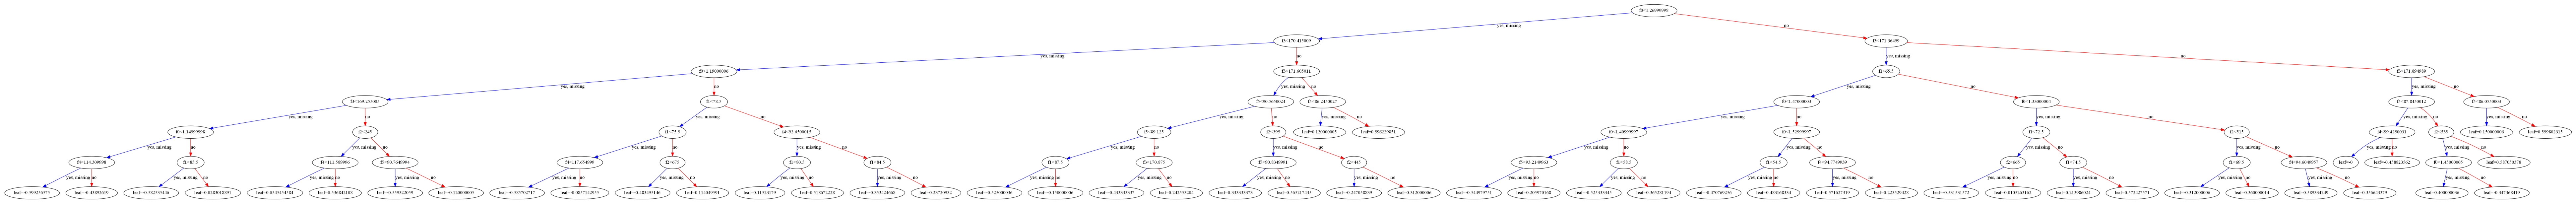

In [28]:
rcParams['figure.figsize'] = 100,200
plot_tree(model)
plt.show()

Feature Importances:
[0.7   0.092 0.025 0.164 0.009 0.009]

I: 0.700
R: 0.092
L: 0.025
mem_5: 0.164
mem_45: 0.009
mem_4: 0.009


<AxesSubplot: >

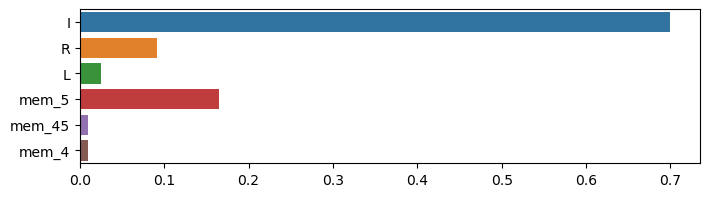

In [29]:
import seaborn as sns
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(model.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(['I', 'R', 'L', 'mem_5', 'mem_45', 'mem_4'], model.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

rcParams['figure.figsize'] = 8, 2
# feature importance 시각화
sns.barplot(x=model.feature_importances_, y=['I', 'R', 'L', 'mem_5', 'mem_45', 'mem_4'])

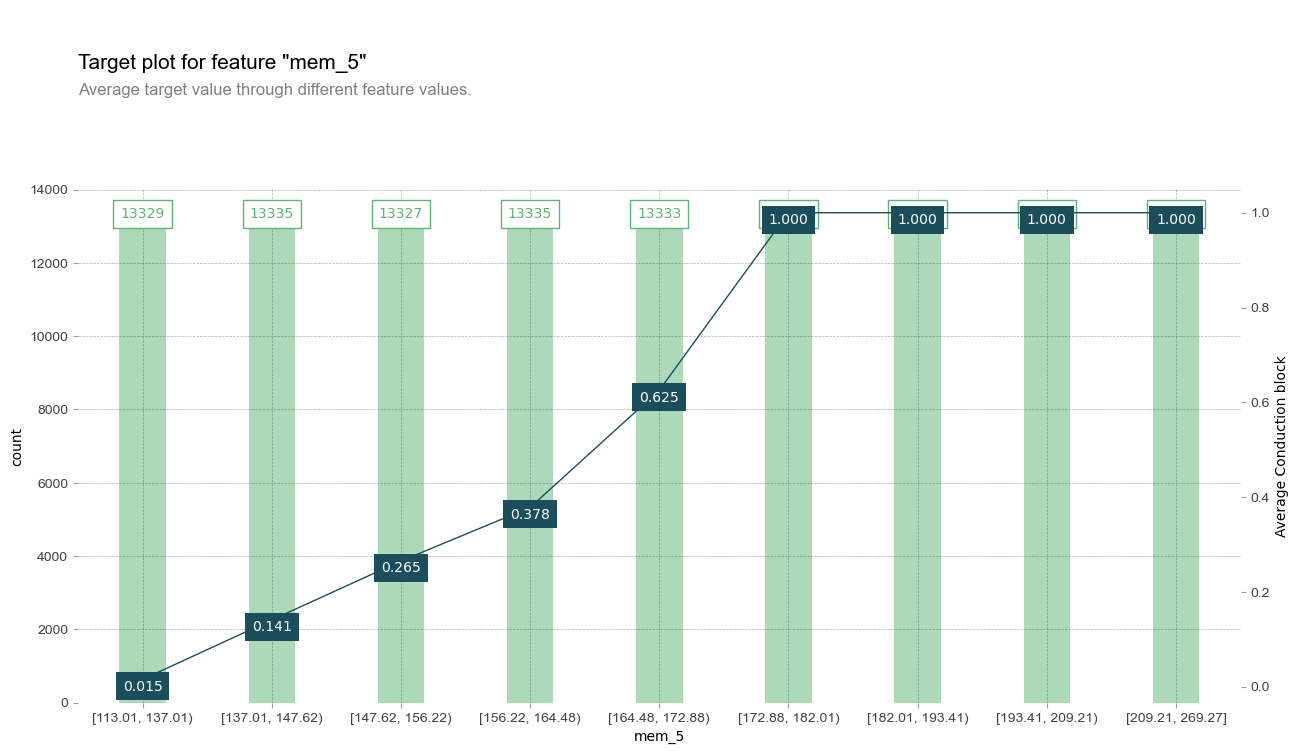

In [30]:
from pdpbox import info_plots

dataset = pd.read_csv('./CB.csv')

pima_data = dataset.copy()
pima_features = dataset.columns[:6]
pima_target = pima_data.columns[6]

fig, axes, summary_df = info_plots.target_plot(
            df = pima_data,
            feature = 'mem_5',
            feature_name = 'mem_5', 
            target = pima_target)

### 중복되는 I와 mem5 중 mem5만 남김

In [31]:
# 학습 데이터로 모델을 학습시키기
model = XGBClassifier(max_depth=4)
model.fit(train_data9, train_label9)

# 예측하기
y_pred = model.predict(val_data9)
predictions = [round(value) for value in y_pred]

# 평가하기
accuracy = accuracy_score(val_label9, predictions)
print('Accuracy : %.2f%%'%(accuracy*100))

[16:06:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 99.43%


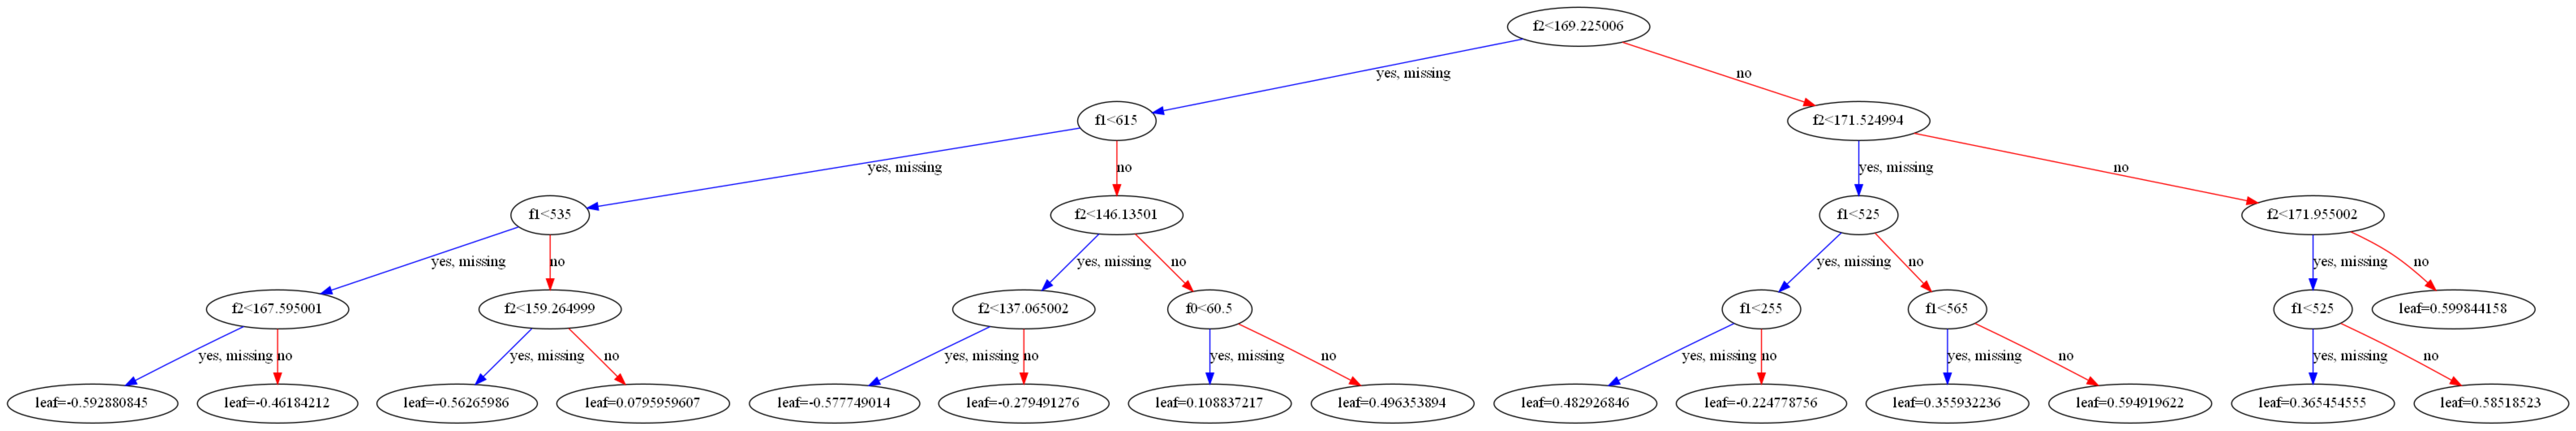

In [32]:
rcParams['figure.figsize'] = 100,200
plot_tree(model)
plt.show()

Feature Importances:
[0.087 0.166 0.747]

R: 0.087
L: 0.166
mem_5: 0.747


<AxesSubplot: >

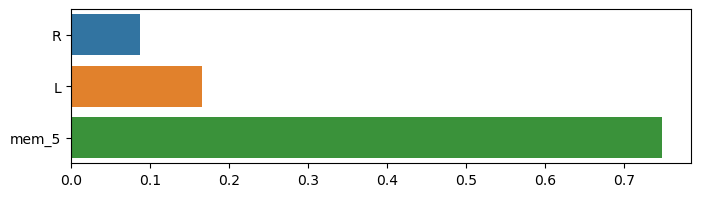

In [33]:
import seaborn as sns
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(model.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(['R', 'L', 'mem_5'], model.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

rcParams['figure.figsize'] = 8, 2
# feature importance 시각화
sns.barplot(x=model.feature_importances_, y=['R', 'L', 'mem_5'])

### I, R, L관련

In [34]:
# 학습 데이터로 모델을 학습시키기
model_IRL = XGBClassifier()
model_IRL.fit(train_data2, train_label2)

# 예측하기
y_pred = model_IRL.predict(val_data2)
predictions = [round(value) for value in y_pred]

# 평가하기
accuracy = accuracy_score(val_label2, predictions)
print('Accuracy : %.2f%%'%(accuracy*100))

[16:06:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 99.54%


Feature Importances:
[0.74  0.161 0.1  ]

I: 0.740
R: 0.161
L: 0.100


<AxesSubplot: >

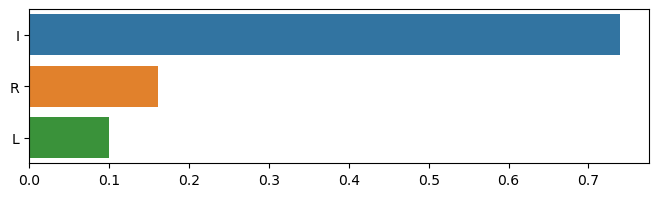

In [35]:
import seaborn as sns
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(model_IRL.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(['I', 'R', 'L'], model_IRL.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

rcParams['figure.figsize'] = 8, 2
# feature importance 시각화
sns.barplot(x=model_IRL.feature_importances_, y=['I', 'R', 'L'])

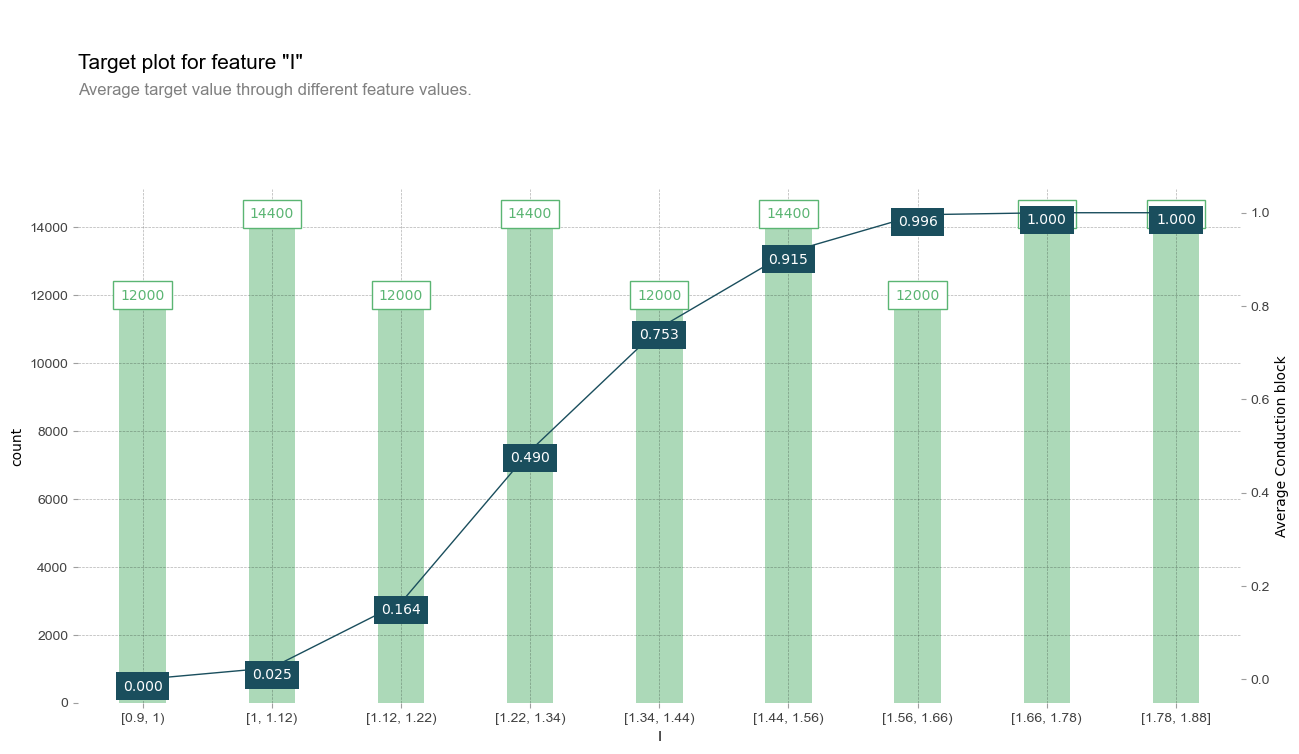

In [36]:
from pdpbox import info_plots

dataset = pd.read_csv('./CB.csv')

pima_data = dataset.copy()
pima_data = pima_data.drop("mem_5", axis=1)
pima_data = pima_data.drop("mem_45", axis=1)
pima_data = pima_data.drop("mem_4", axis=1)
pima_features = dataset.columns[:3]
pima_target = pima_data.columns[3]

fig, axes, summary_df = info_plots.target_plot(
            df = pima_data,
            feature = 'I',
            feature_name = 'I', 
            target = pima_target)

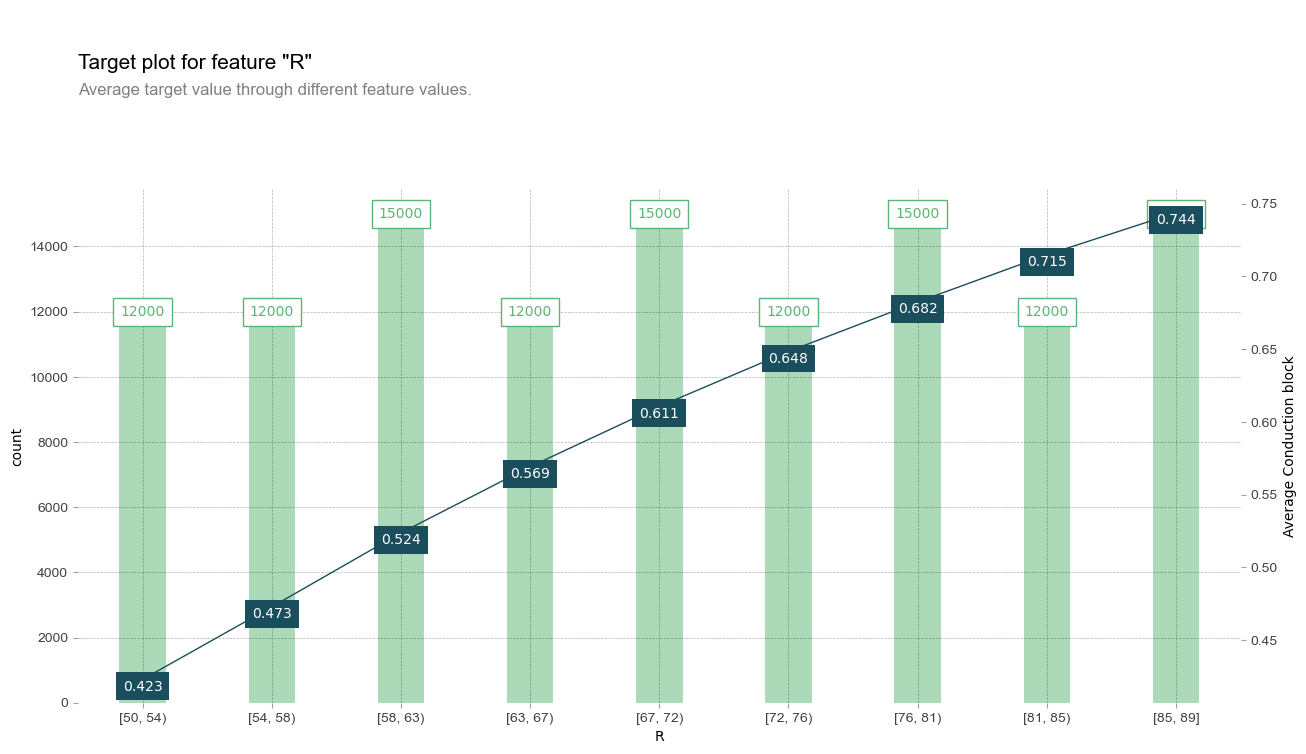

In [37]:
fig=axes=summary_df = info_plots.target_plot(
            df = pima_data,
            feature = 'R',
            feature_name = 'R', 
            target = pima_target)

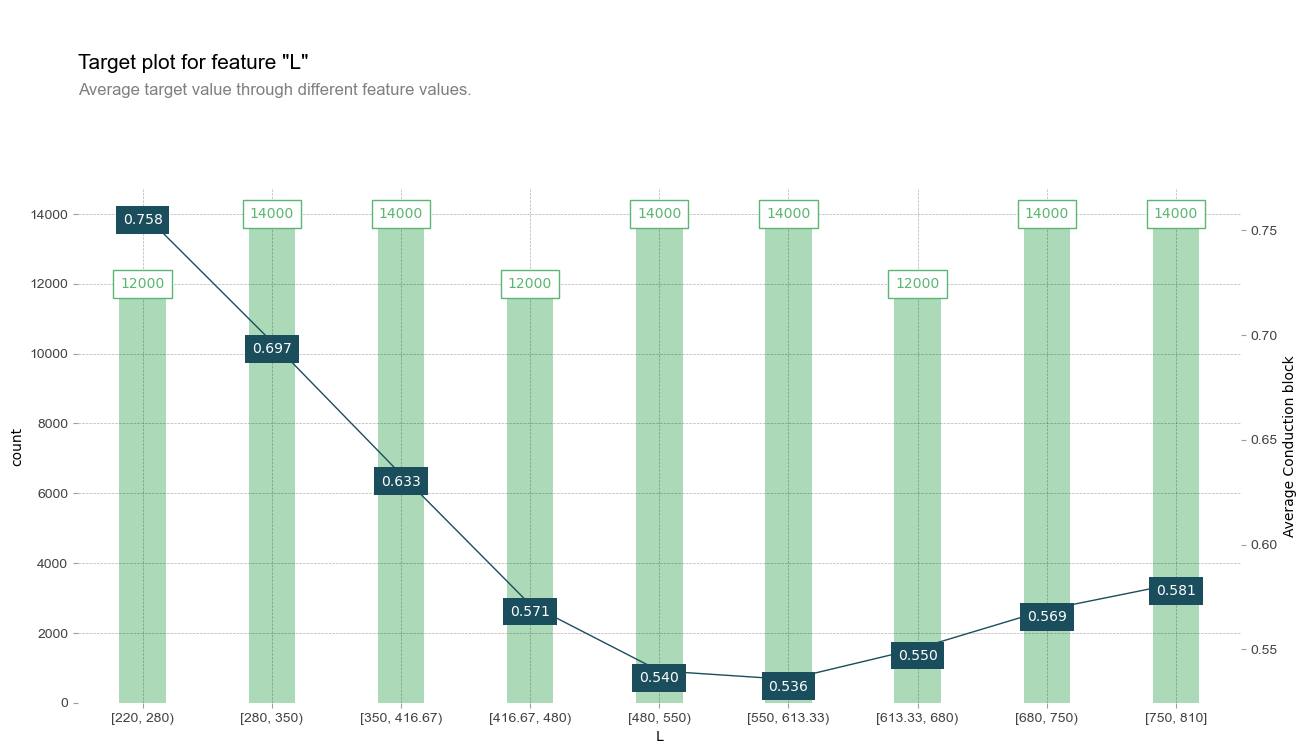

In [38]:
fig=axes=summary_df = info_plots.target_plot(
            df = pima_data,
            feature = 'L',
            feature_name = 'L', 
            target = pima_target)

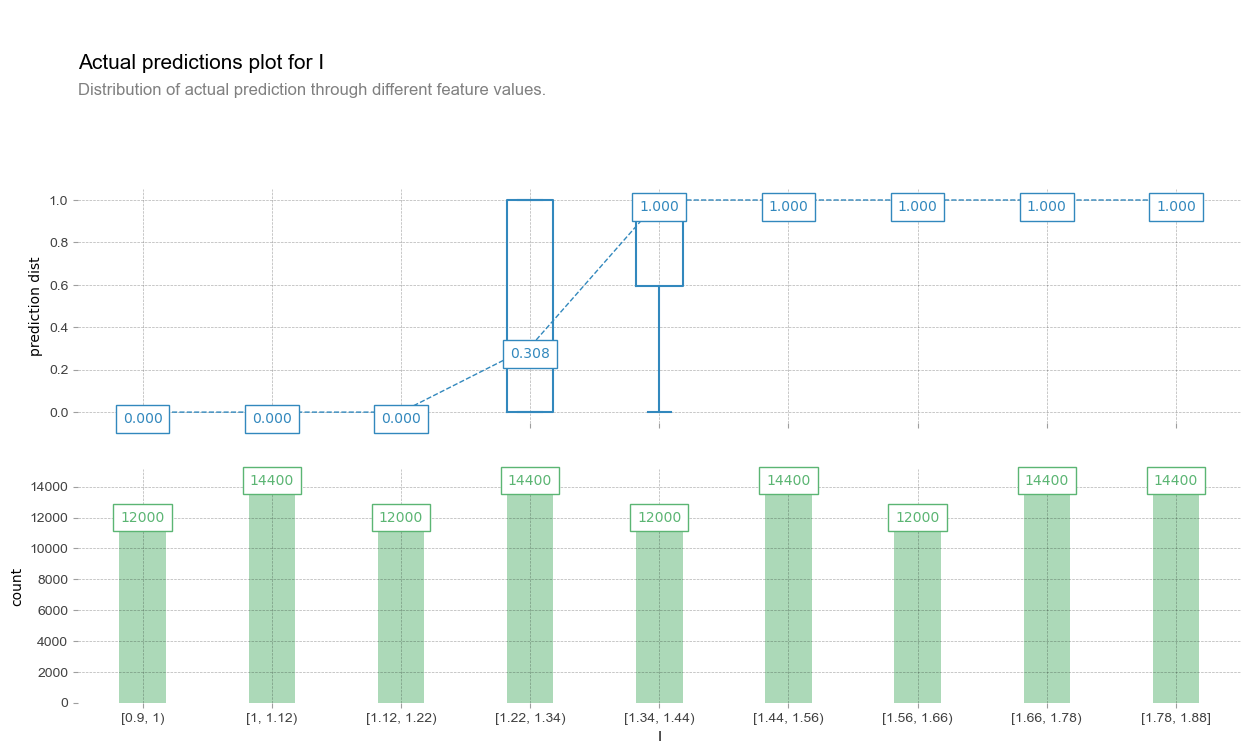

In [39]:
fig, axes, summary_df = info_plots.actual_plot(
            model = model_IRL,
            X = pima_data[pima_features],
            feature = 'I',
            feature_name = 'I', 
            predict_kwds = {}
            )

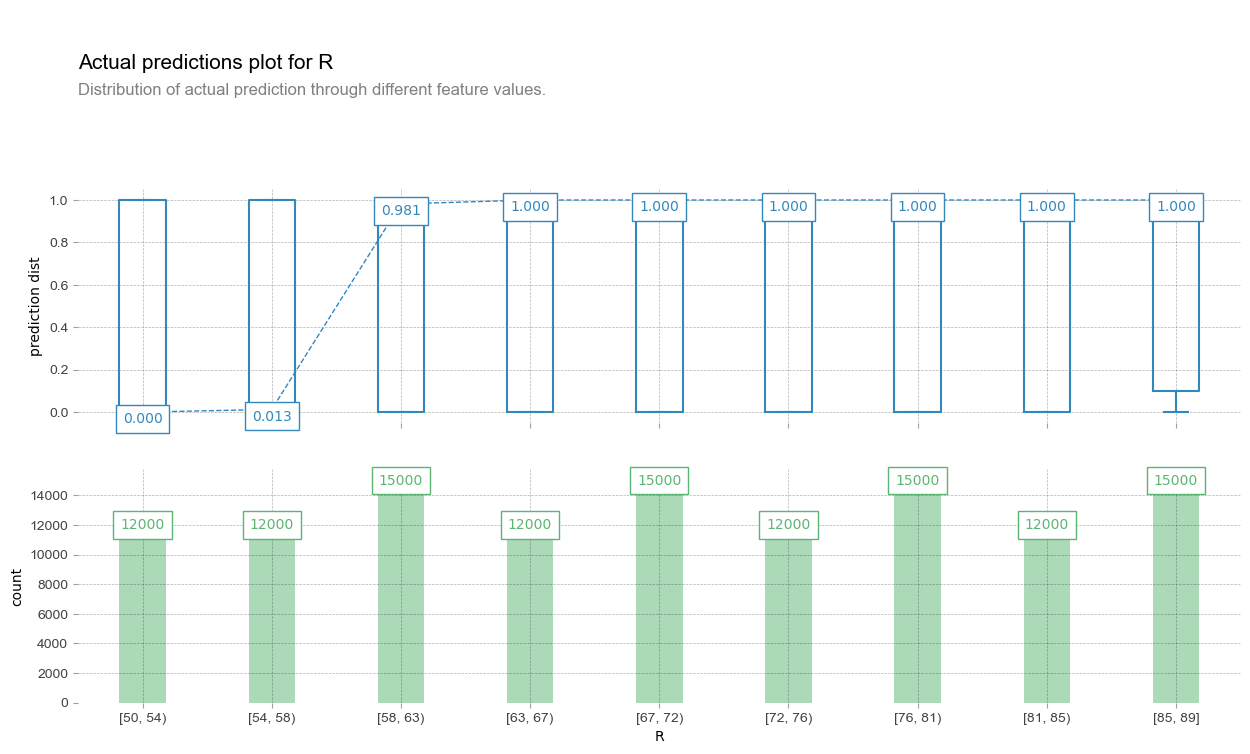

In [40]:
fig, axes, summary_df = info_plots.actual_plot(
            model = model_IRL,
            X = pima_data[pima_features],
            feature = 'R',
            feature_name = 'R', 
            predict_kwds = {}
            )

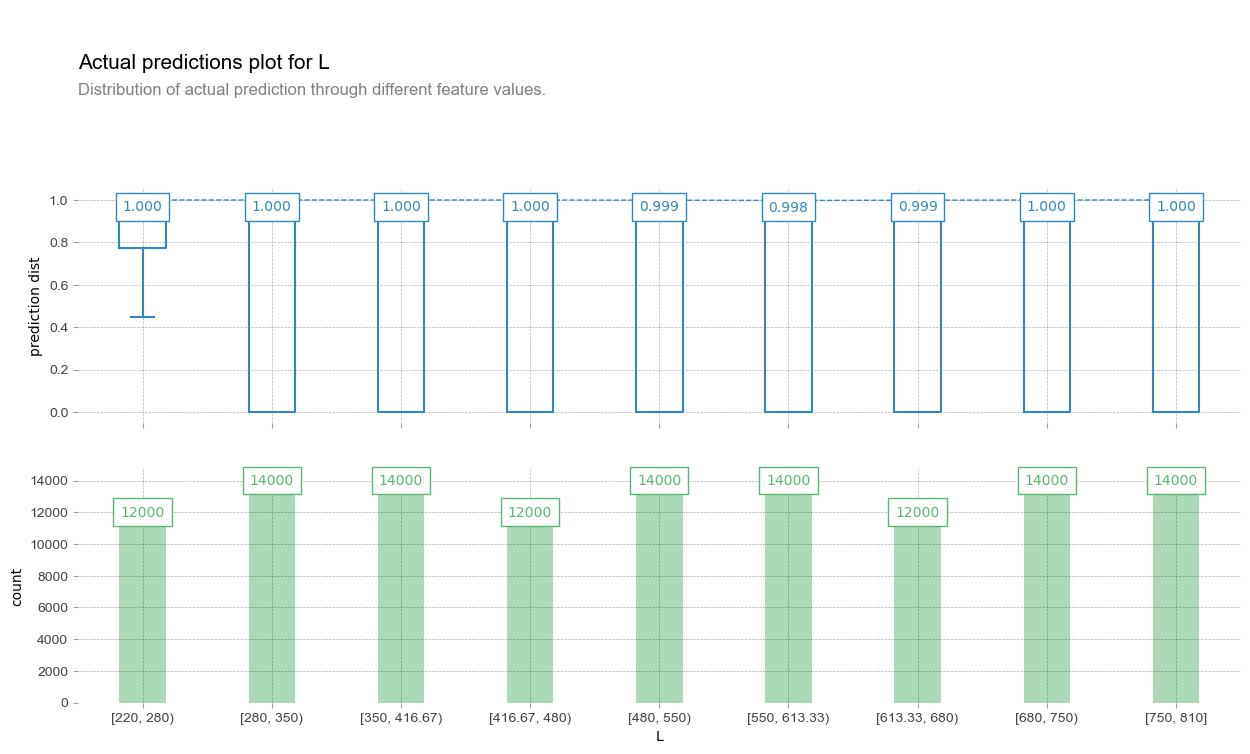

In [41]:
fig, axes, summary_df = info_plots.actual_plot(
            model = model_IRL,
            X = pima_data[pima_features],
            feature = 'L',
            feature_name = 'L', 
            predict_kwds = {}
            )

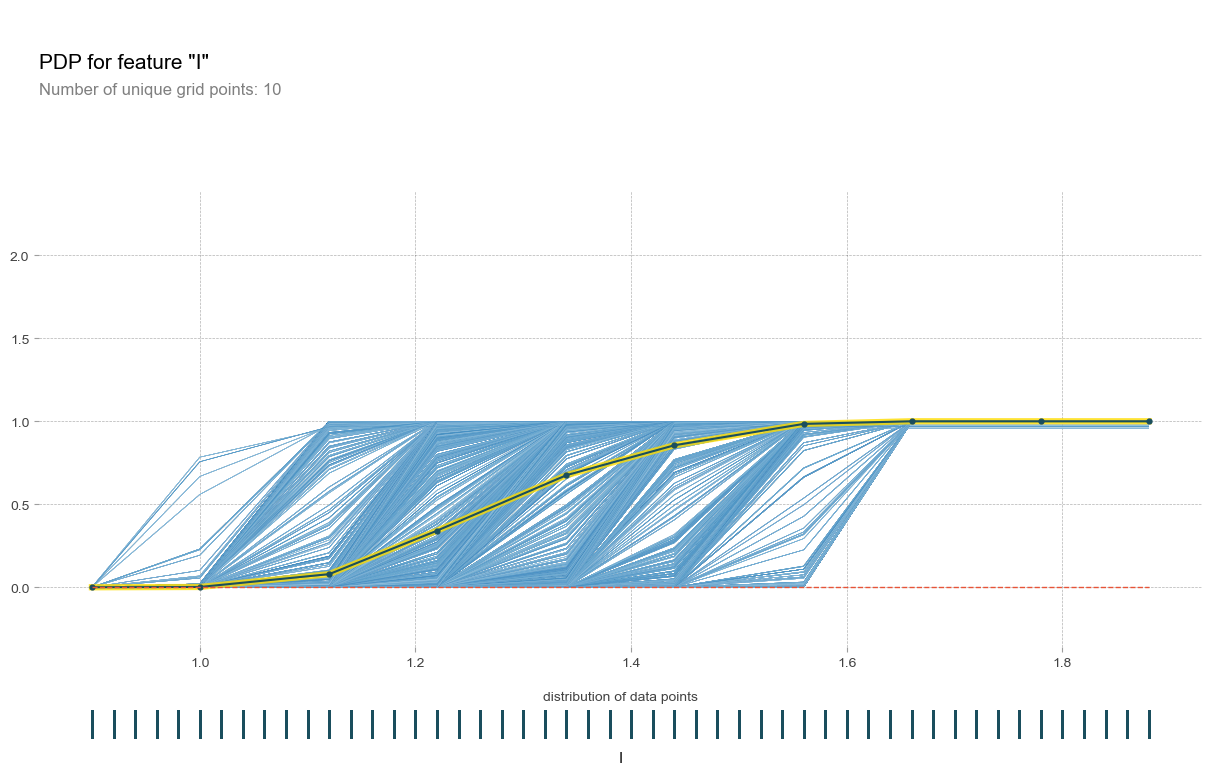

In [42]:
from pdpbox.pdp import pdp_isolate, pdp_plot

pdp_gc = pdp_isolate(
            model = model_IRL,
            dataset = pima_data,
            model_features = pima_features,
            feature = 'I')

# 플롯 정보 설정
fig, axes = pdp_plot(
        pdp_gc,
        'I',
        plot_lines = True,
        frac_to_plot = 0.5,
        plot_pts_dist = True)

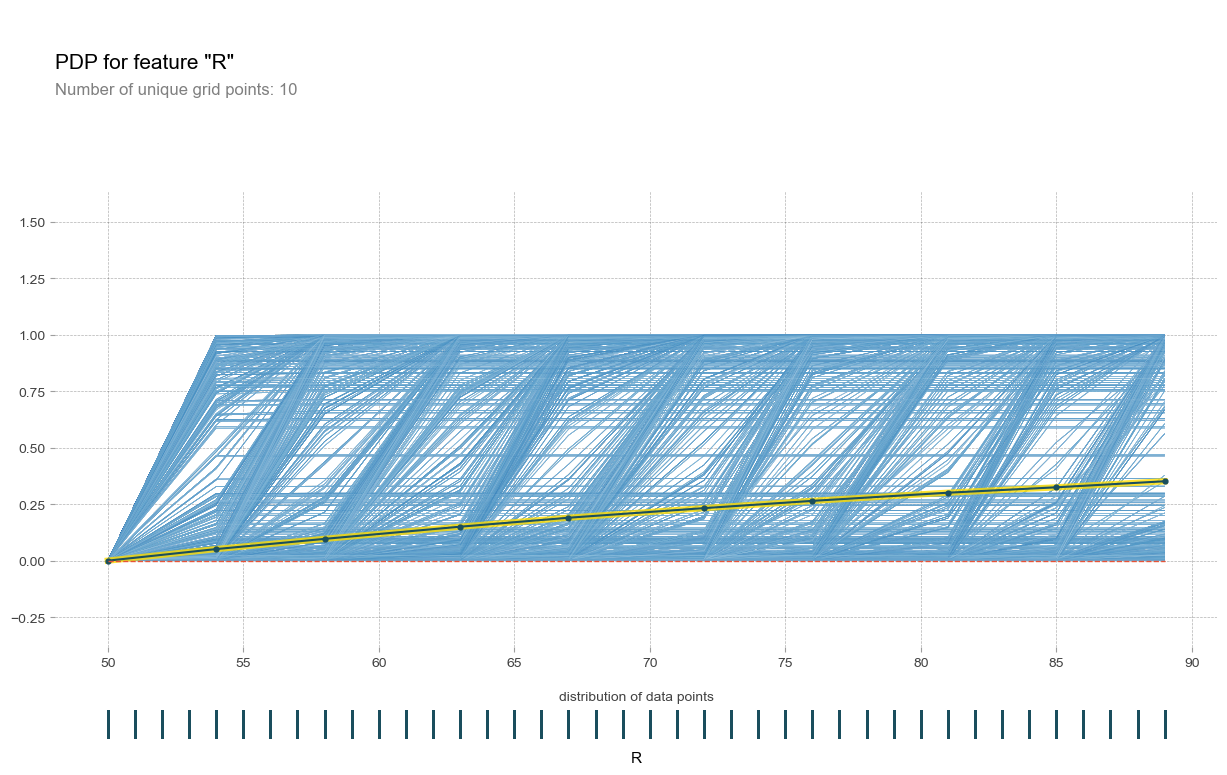

In [43]:
from pdpbox.pdp import pdp_isolate, pdp_plot

pdp_gc = pdp_isolate(
            model = model_IRL,
            dataset = pima_data,
            model_features = pima_features,
            feature = 'R')

# 플롯 정보 설정
fig, axes = pdp_plot(
        pdp_gc,
        'R',
        plot_lines = True,
        frac_to_plot = 0.5,
        plot_pts_dist = True)

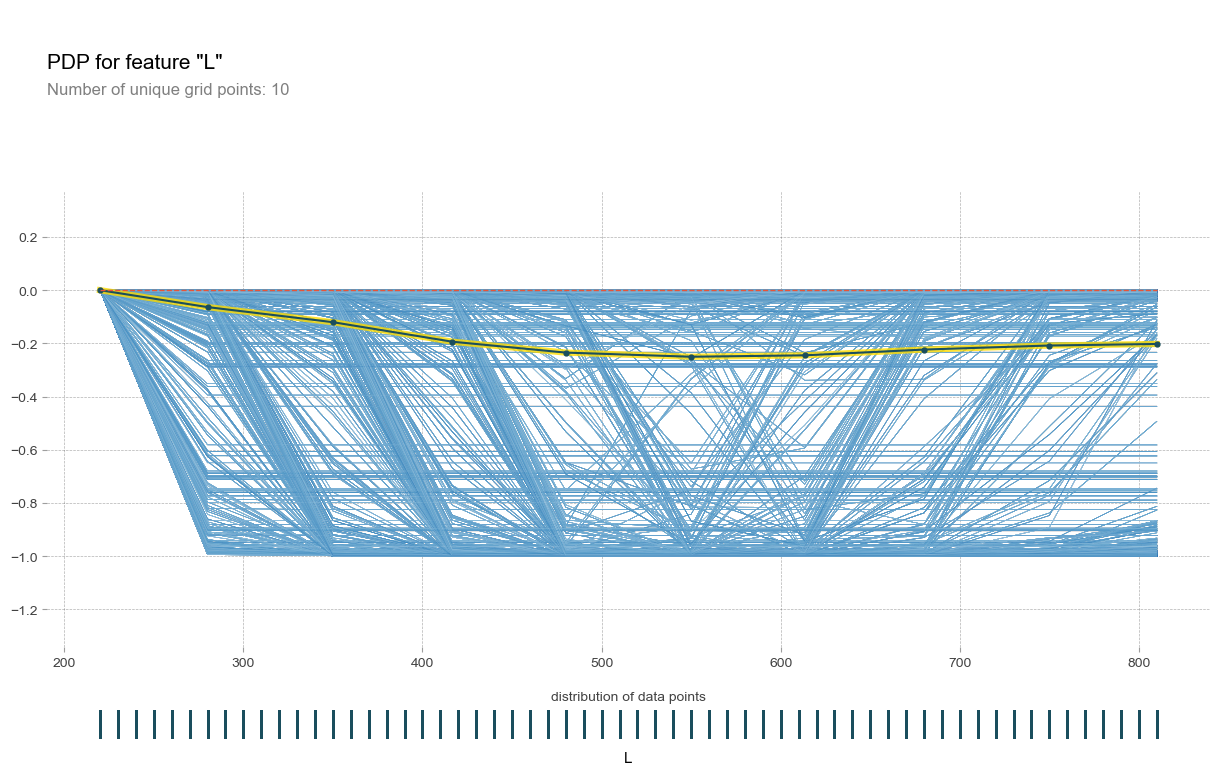

In [44]:
from pdpbox.pdp import pdp_isolate, pdp_plot

pdp_gc = pdp_isolate(
            model = model_IRL,
            dataset = pima_data,
            model_features = pima_features,
            feature = 'L')

# 플롯 정보 설정
fig, axes = pdp_plot(
        pdp_gc,
        'L',
        plot_lines = True,
        frac_to_plot = 0.5,
        plot_pts_dist = True)

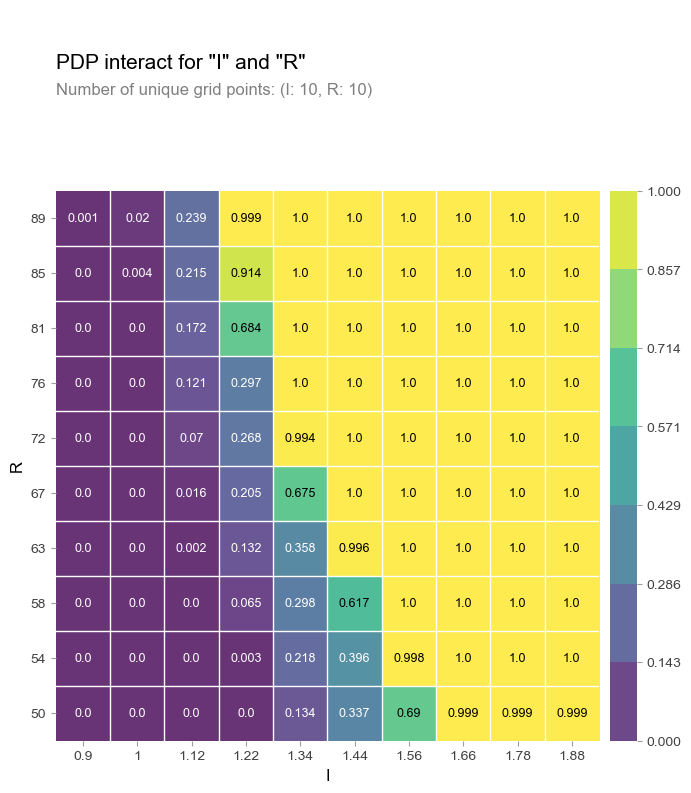

In [45]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

interaction = pdp_interact(
    model=model_IRL, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=["I", "R"]
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=["I", "R"]);

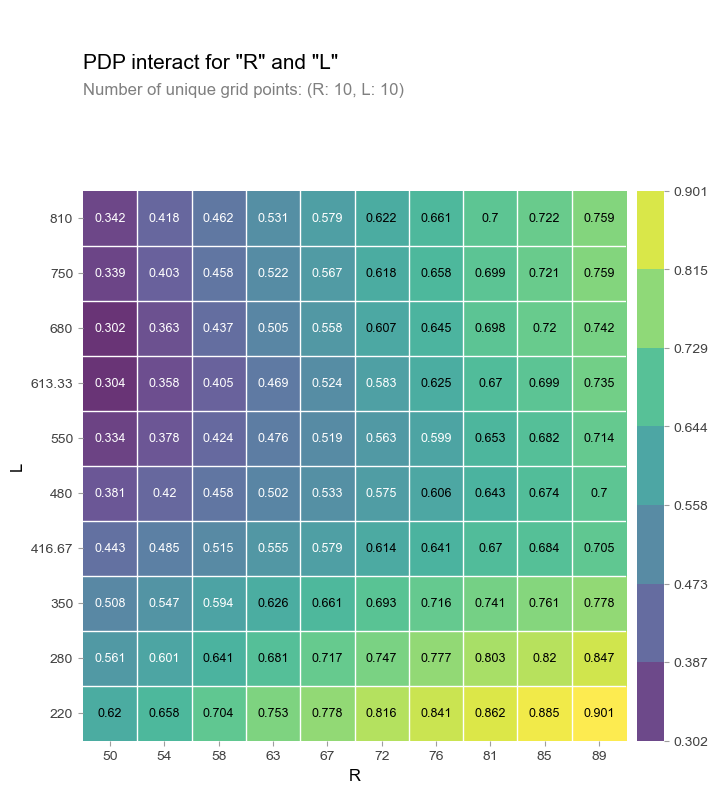

In [46]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

interaction = pdp_interact(
    model=model_IRL, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=["R", "L"]
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=["R", "L"]);

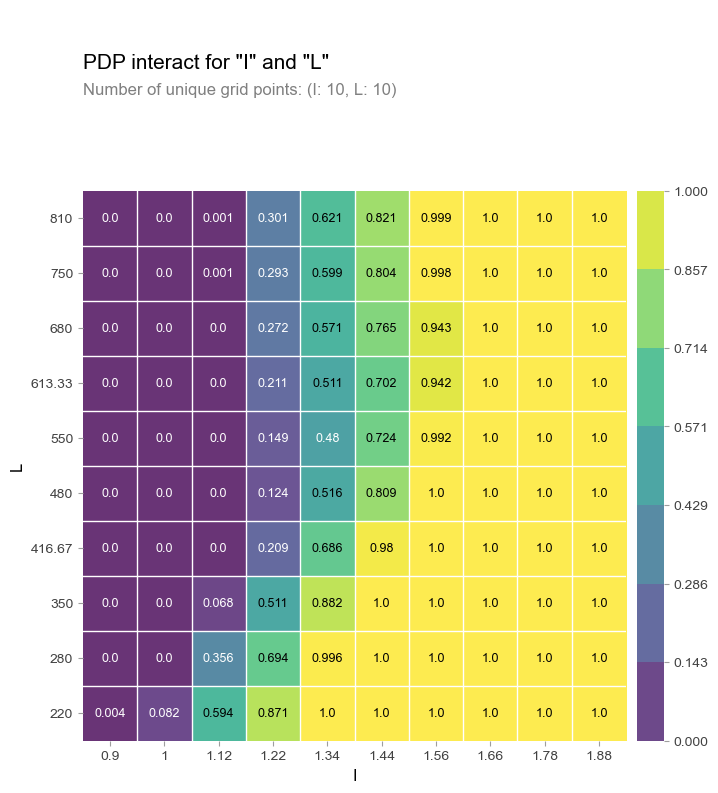

In [47]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

interaction = pdp_interact(
    model=model_IRL, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=["I", "L"]
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=["I", "L"]);

### membrane potential 관련

In [53]:
# 학습 데이터로 모델을 학습시키기
model_mem = XGBClassifier()
model_mem.fit(train_data1, train_label1)

# 예측하기
y_pred = model_mem.predict(val_data1)
predictions = [round(value) for value in y_pred]

# 평가하기
accuracy = accuracy_score(val_label1, predictions)
print('Accuracy : %.2f%%'%(accuracy*100))

[13:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 99.35%


Feature Importances:
[0.913 0.056 0.031]

mem5: 0.913
mem45: 0.056
mem4: 0.031


<AxesSubplot: >

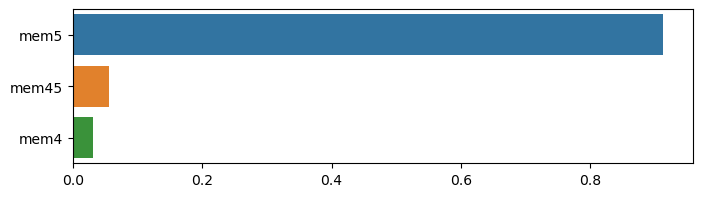

In [55]:
import seaborn as sns
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(model_mem.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(['mem5', 'mem45', 'mem4'], model_mem.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

rcParams['figure.figsize'] = 8, 2
# feature importance 시각화
sns.barplot(x=model_mem.feature_importances_, y=['mem5', 'mem45', 'mem4'])

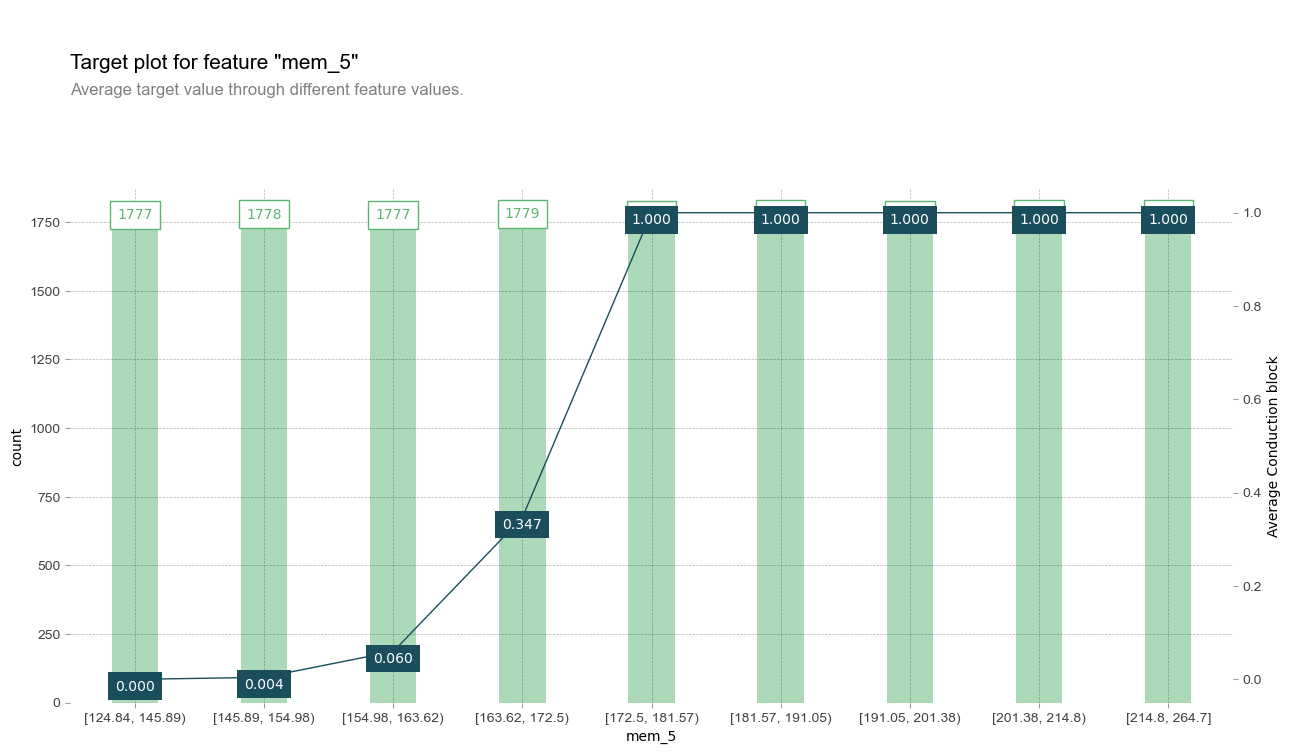

In [56]:
dataset = pd.read_csv('./CB.csv')

pima_data = dataset.copy()
pima_data = pima_data.drop("I", axis=1)
pima_data = pima_data.drop("R", axis=1)
pima_data = pima_data.drop("L", axis=1)
pima_features = dataset.columns[:3]
pima_target = pima_data.columns[3]

fig, axes, summary_df = info_plots.target_plot(
            df = pima_data,
            feature = 'mem_5',
            feature_name = 'mem_5', 
            target = pima_target)

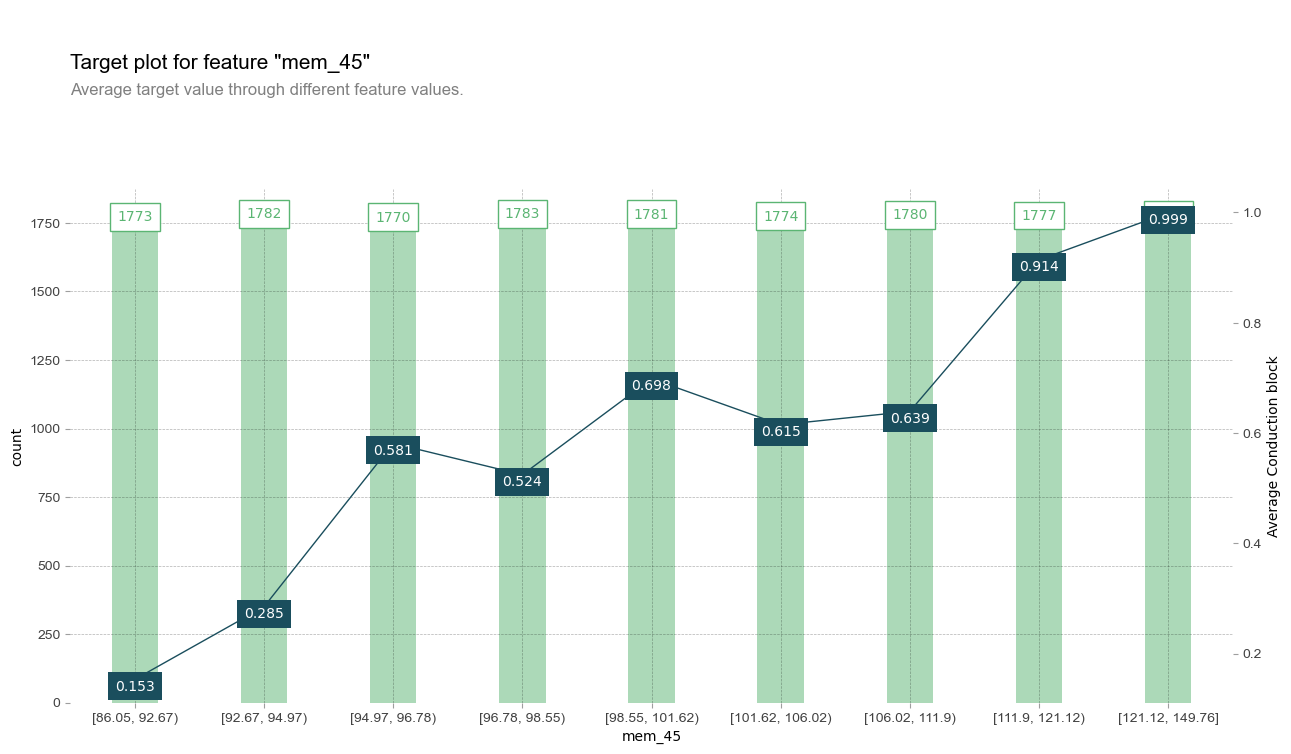

In [57]:
dataset = pd.read_csv('./CB.csv')

pima_data = dataset.copy()
pima_data = pima_data.drop("I", axis=1)
pima_data = pima_data.drop("R", axis=1)
pima_data = pima_data.drop("L", axis=1)
pima_features = dataset.columns[:3]
pima_target = pima_data.columns[3]

fig, axes, summary_df = info_plots.target_plot(
            df = pima_data,
            feature = 'mem_45',
            feature_name = 'mem_45', 
            target = pima_target)

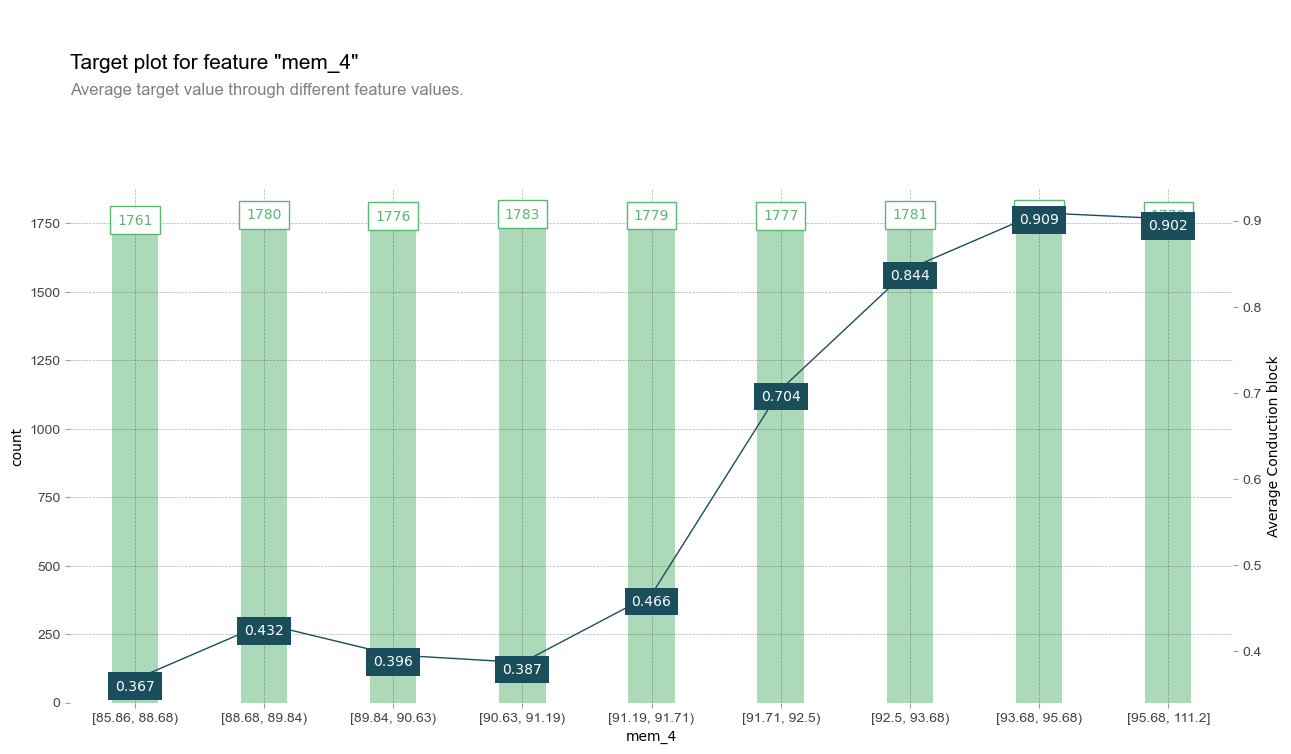

In [63]:
dataset = pd.read_csv('./CB.csv')

pima_data = dataset.copy()
pima_data = pima_data.drop("I", axis=1)
pima_data = pima_data.drop("R", axis=1)
pima_data = pima_data.drop("L", axis=1)
pima_features = dataset.columns[3:6]
pima_target = pima_data.columns[3]

fig, axes, summary_df = info_plots.target_plot(
            df = pima_data,
            feature = 'mem_4',
            feature_name = 'mem_4', 
            target = pima_target)

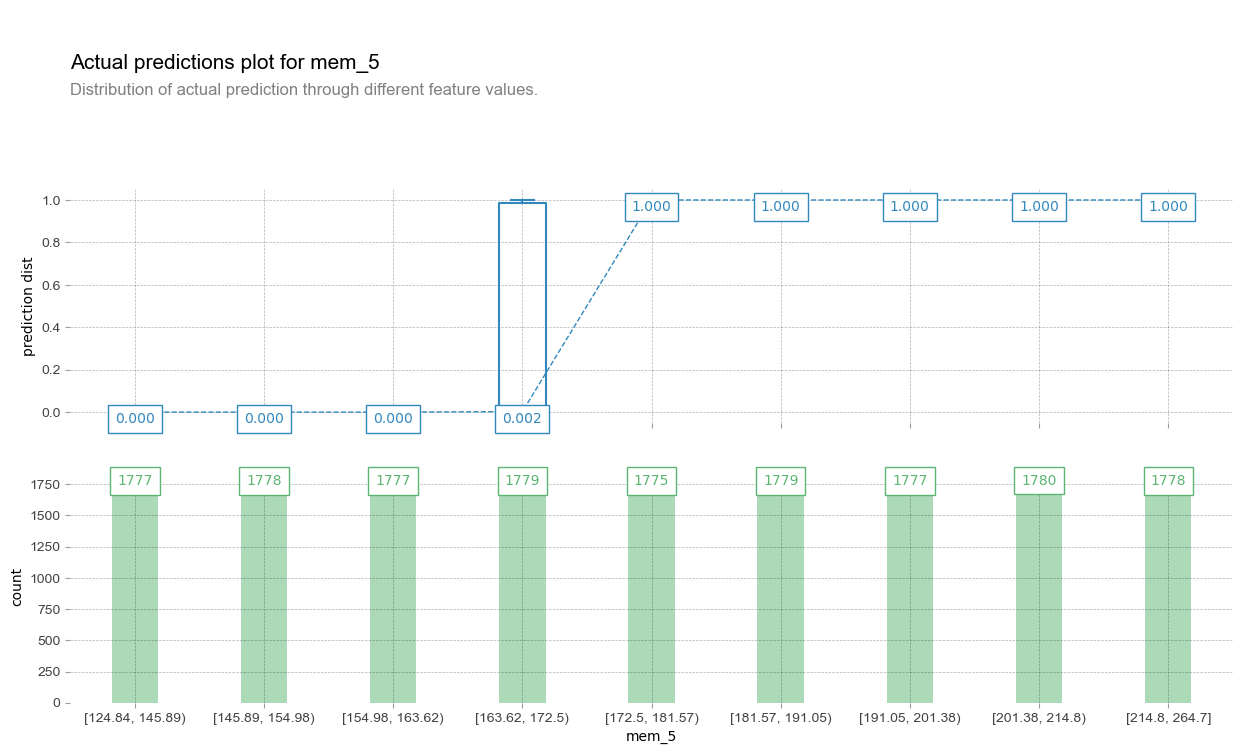

In [65]:
fig, axes, summary_df = info_plots.actual_plot(
            model = model_mem,
            X = pima_data[pima_features],
            feature = 'mem_5',
            feature_name = 'mem_5', 
            predict_kwds = {}
            )

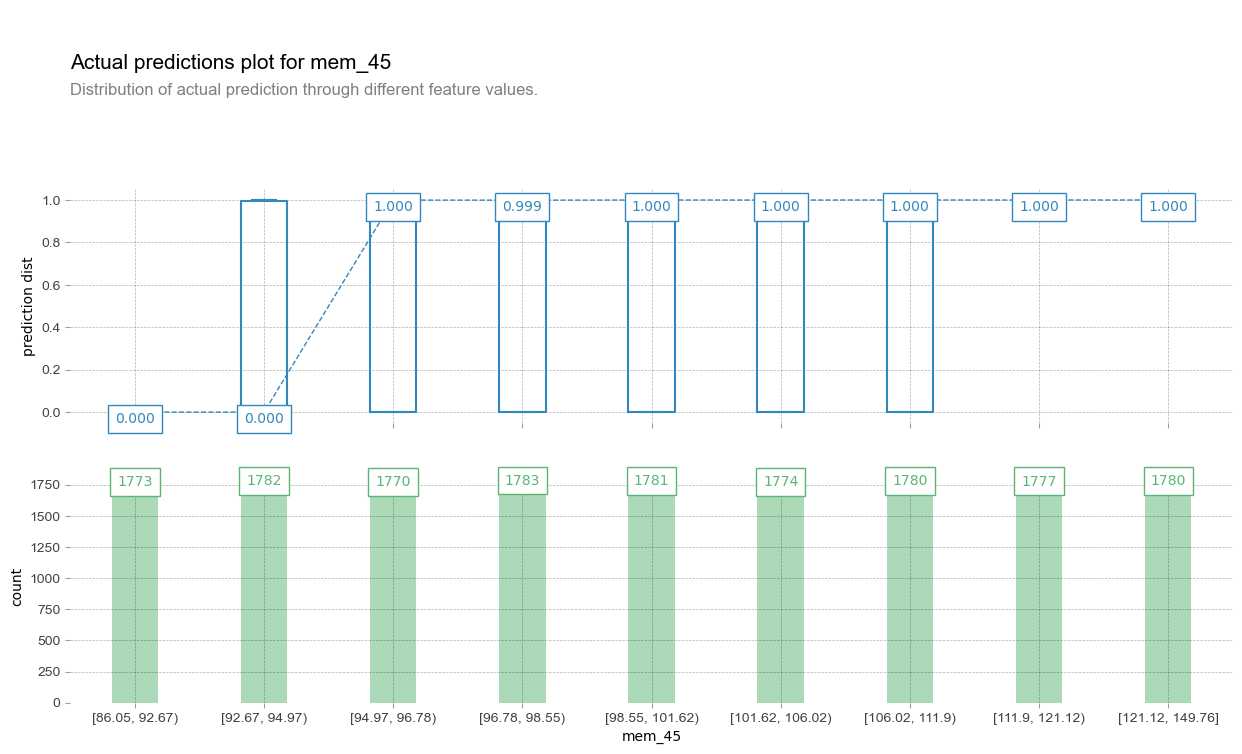

In [66]:
fig, axes, summary_df = info_plots.actual_plot(
            model = model_mem,
            X = pima_data[pima_features],
            feature = 'mem_45',
            feature_name = 'mem_45', 
            predict_kwds = {}
            )

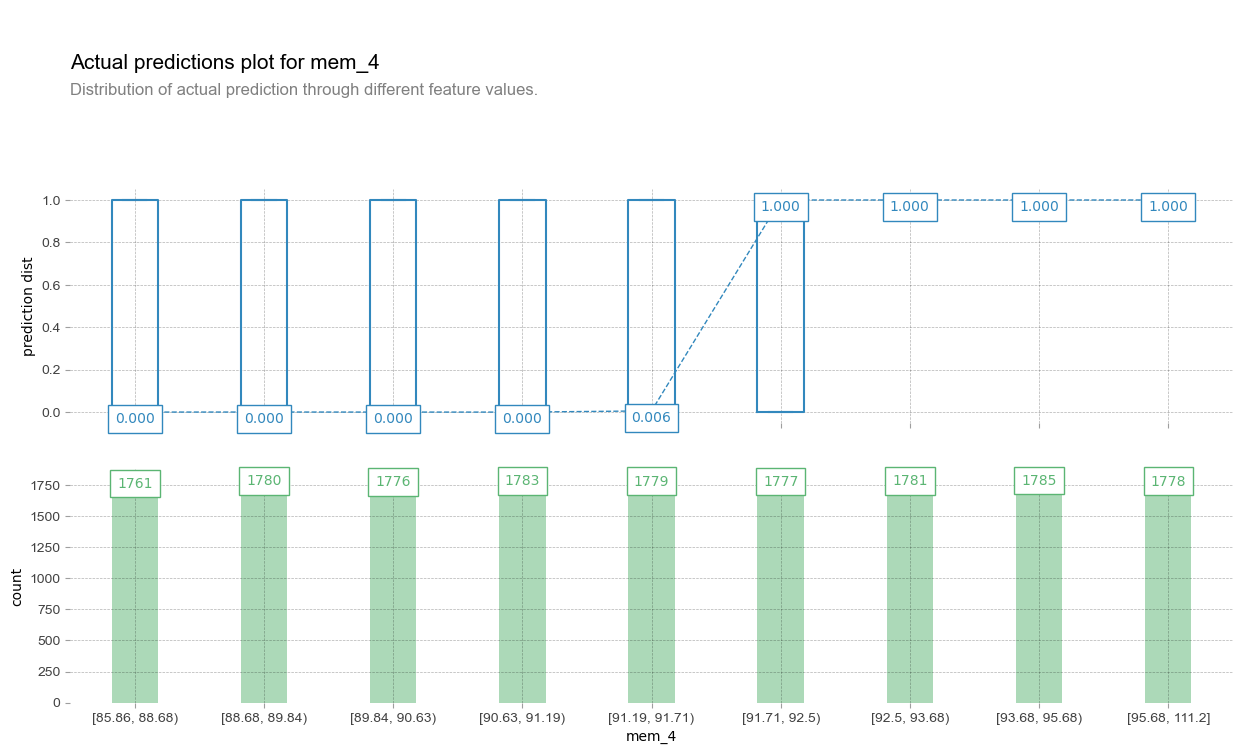

In [67]:
fig, axes, summary_df = info_plots.actual_plot(
            model = model_mem,
            X = pima_data[pima_features],
            feature = 'mem_4',
            feature_name = 'mem_4', 
            predict_kwds = {}
            )